# Árvore de Decisão

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Passo 1. Carregamento dos dados

In [3]:
df = pd.read_csv('../../dados/processados/2015_clean.csv')

In [4]:
df.head()

,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,TP_LOCALIZACAO,IN_LOCAL_FUNC_PREDIO_ESCOLAR,IN_LOCAL_FUNC_SALAS_EMPRESA,IN_LOCAL_FUNC_SOCIOEDUCATIVO,IN_LOCAL_FUNC_UNID_PRISIONAL,IN_LOCAL_FUNC_PRISIONAL_SOCIO,IN_LOCAL_FUNC_TEMPLO_IGREJA,IN_LOCAL_FUNC_CASA_PROFESSOR,IN_LOCAL_FUNC_GALPAO,IN_LOCAL_FUNC_SALAS_OUTRA_ESC,IN_LOCAL_FUNC_OUTROS,IN_PREDIO_COMPARTILHADO,IN_AGUA_FILTRADA,IN_AGUA_REDE_PUBLICA,IN_AGUA_POCO_ARTESIANO,IN_AGUA_CACIMBA,IN_AGUA_FONTE_RIO,IN_AGUA_INEXISTENTE,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR,IN_ENERGIA_OUTROS,IN_ESGOTO_REDE_PUBLICA,IN_ESGOTO_FOSSA,IN_ESGOTO_INEXISTENTE,IN_LIXO_COLETA_PERIODICA,IN_LIXO_QUEIMA,...,SG_UF_ESCOLA_RJ,SG_UF_ESCOLA_RN,SG_UF_ESCOLA_RO,SG_UF_ESCOLA_RR,SG_UF_ESCOLA_RS,SG_UF_ESCOLA_SC,SG_UF_ESCOLA_SE,SG_UF_ESCOLA_SP,SG_UF_ESCOLA_TO,INSE_Grupo 1,INSE_Grupo 2,INSE_Grupo 3,INSE_Grupo 4,INSE_Grupo 5,INSE_Grupo 6,PORTE_ESCOLA_De 1 a 30 alunos,PORTE_ESCOLA_De 31 a 60 alunos,PORTE_ESCOLA_De 61 a 90 alunos,PORTE_ESCOLA_Maior que 90 alunos,TP_DEPENDENCIA_1,TP_DEPENDENCIA_2,TP_DEPENDENCIA_3,TP_DEPENDENCIA_4,TP_REGULAMENTACAO_0.0,TP_REGULAMENTACAO_1.0,TP_REGULAMENTACAO_2.0,TP_OCUPACAO_PREDIO_ESCOLAR_1.0,TP_OCUPACAO_PREDIO_ESCOLAR_2.0,TP_OCUPACAO_PREDIO_ESCOLAR_3.0,TP_AEE_0.0,TP_AEE_1.0,TP_ATIVIDADE_COMPLEMENTAR_0.0,TP_ATIVIDADE_COMPLEMENTAR_1.0,TP_LOCALIZACAO_DIFERENCIADA_0.0,TP_LOCALIZACAO_DIFERENCIADA_1.0,TP_LOCALIZACAO_DIFERENCIADA_2.0,TP_LOCALIZACAO_DIFERENCIADA_3.0,TP_LOCALIZACAO_DIFERENCIADA_4.0,TP_LOCALIZACAO_DIFERENCIADA_6.0,VALOR_FALTANTE
0,591.64,652.34,604.53,627.66,732.00,137.0,0.0,130.0,94.89,67.5,78.46,96.1,3.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,458.46,533.51,472.62,459.72,507.82,20.0,1.0,17.0,85.00,58.3,70.59,94.6,5.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,529.05,583.87,547.11,507.22,652.43,39.0,0.0,37.0,94.87,67.7,40.54,90.1,9.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,508.74,586.45,531.35,529.87,591.84,55.0,1.0,49.0,89.09,56.0,81.63,88.7,10.5,0.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,523.38,591.66,563.45,528.93,583.48,26.0,0.0,23.0,88.46,72.7,52.17,84.5,13.1,2.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Passo 2. Divisão do dataframe

Primeiramente, o dataframe foi dividido em dois, um contendo as variáveis independentes e o outro contendo as variáveis dependentes. A variável dependente é a nota média de redação. As outras notas foram removidas.

In [5]:
X = df.drop(['NU_MEDIA_CN', 'NU_MEDIA_CH', 'NU_MEDIA_LP', 'NU_MEDIA_MT', 'NU_MEDIA_RED'], axis=1)
y = df['NU_MEDIA_RED']

Então, dividiu-se o dataframe em dados de treino e dados de teste. Nesse caso, a proporção aplicada é de 80% para treino e 20%  para teste.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 3. Treinamento do modelo

## Método 1. Sem mudança nos hiperparâmetros

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

## Método 2. Busca dos hiperparâmetros com grid search

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth':[None, *np.arange(2, 20)],
    'max_features': [None, X.shape[1]//2, X.shape[1]//4, X.shape[1]//8, X.shape[1]//16]
}

tree_gs = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, n_jobs=-1, cv=5, verbose=10)

In [9]:
tree_gs.fit(X_train, y_train)

Fitting 5 folds for each of 95 candidates, totalling 475 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1930s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1243s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1957s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0339s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 217 ta

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'max_features': [None, 97, 48,

É possível visualizar os parâmetros do melhor modelo encontrado no grid search:

In [10]:
tree_gs.best_params_

{'max_depth': 6, 'max_features': None}

## Backup dos modelos

In [ ]:
import joblib

# Sem tunagem
# joblib.dump(tree_reg, '../../modelos/tree_reg.joblib')

# GridSearch
# joblib.dump(tree_gs, '../../modelos/tree_gs.joblib')

# Recuperando
# tree_reg = joblib.load('../../modelos/tree_reg.joblib')
# tree_gs = joblib.load('../../modelos/tree_gs.joblib')

# Passo 4. Avaliação do modelo

Para avaliar a importância de cada atributo ao modelo, pode-se verificar o atributo feature_importances_ do modelo.

In [45]:
tree_importances = pd.Series(data=tree_reg.feature_importances_, index=X.columns)
tree_gs_importances = pd.Series(data=tree_gs.best_estimator_.feature_importances_, index=X.columns)

In [46]:
tree_importances.sort_values(ascending=False).head(10)

TP_DEPENDENCIA_2        0.474358
NU_TAXA_PARTICIPACAO    0.121518
INSE_Grupo 6            0.047541
NU_PARTICIPANTES        0.024045
PC_FORMACAO_DOCENTE     0.019721
INSE_Grupo 5            0.018111
NU_FUNCIONARIOS         0.018080
NU_TAXA_PERMANENCIA     0.017135
NU_MATRICULAS           0.012922
NU_COMPUTADOR           0.012649
dtype: float64

In [47]:
tree_gs_importances.sort_values(ascending=False).head(10)

TP_DEPENDENCIA_2        0.675344
NU_TAXA_PARTICIPACAO    0.148562
INSE_Grupo 6            0.067684
INSE_Grupo 5            0.024554
NU_PARTICIPANTES        0.015972
INSE_Grupo 1            0.013839
NU_TAXA_ABANDONO        0.008517
INSE_Grupo 4            0.008435
PC_FORMACAO_DOCENTE     0.005544
SG_UF_ESCOLA_SP         0.004647
dtype: float64

Foram aplicadas três métricas para avaliar o modelo de regressão:

- RMSE (Root Mean Squared Error)

- R2 (coefficient of determination)

- MAE (Mean Absolute Error)

In [11]:
from sklearn.metrics import mean_squared_error,  r2_score, mean_absolute_error

y_preds = []
rmse = []
r2 = []
mae = []

for model in [tree_reg, tree_gs]:
  pred = model.predict(X_test)
  y_preds.append(pred)
  rmse.append(mean_squared_error(y_test, pred, squared=False))
  r2.append(r2_score(y_test, pred))
  mae.append(mean_absolute_error(y_test, pred))

In [12]:
for i, model in enumerate(['Sem ajuste', 'GridSearch']):
  print(model)
  print('\t RMSE:', rmse[i])
  print('\t MAE:', mae[i])
  print('\t R2:', r2[i])

Sem ajuste
	 RMSE: 57.26720529954743
	 MAE: 43.25451282051282
	 R2: 0.4454486590401674
GridSearch
	 RMSE: 44.55913069683494
	 MAE: 33.83198501983879
	 R2: 0.6642599120866887


O gráfico abaixo é uma relação dos valores reais com os valores preditos. A linha vermelha é uma referência (função identidade) para a posição ideal dos valores (valor predito = valor real).

## Árvore de decisão sem mudança nos hiperparâmetros

<Figure size 432x288 with 0 Axes>

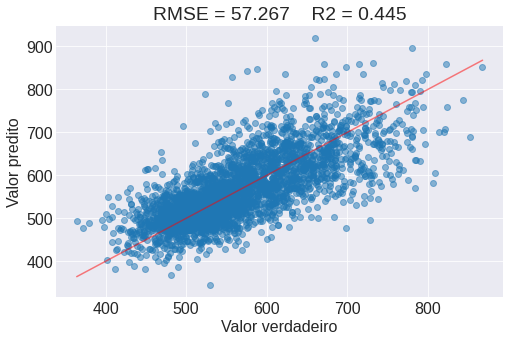

In [37]:
plt.rcParams.update({'font.size':16})
plt.style.use('seaborn-darkgrid')
plt.tight_layout()

fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(8)

x = np.linspace(y_test.min(), y_test.max()+1)
ax.plot(x, x, c='r', alpha=0.5)
ax.set(xlabel='Valor verdadeiro', ylabel='Valor predito')

ax.scatter(y_test, y_preds[0], alpha=0.5)
ax.set_title('RMSE = {0:.5}    R2 = {1:.3}'.format(rmse[0], r2[0]))
plt.savefig('../../graficos/modelos/decision_tree_sa.pdf')

## Árvore de decisão com grid search

<Figure size 432x288 with 0 Axes>

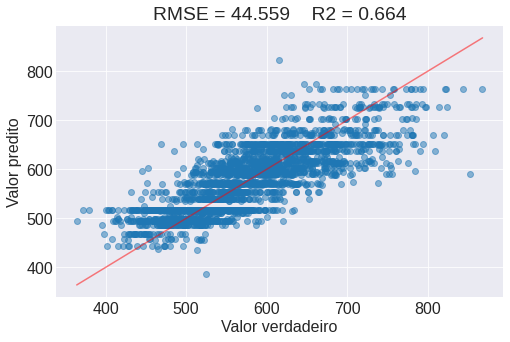

In [38]:
plt.tight_layout()

fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(8)

x = np.linspace(y_test.min(), y_test.max()+1)
ax.plot(x, x, c='r', alpha=0.5)
ax.set(xlabel='Valor verdadeiro', ylabel='Valor predito')

ax.scatter(y_test, y_preds[1], alpha=0.5)
ax.set_title('RMSE = {0:.5}    R2 = {1:.3}'.format(rmse[1], r2[1]))
plt.savefig('../../graficos/modelos/decision_tree_gs.pdf')